# CNNを実装しよう

In [1]:
%matplotlib inline
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# MNISTデータを読込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# 行列として入力するための加工
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
input_shape = (28, 28, 1)

In [3]:
# 入力データ
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# ラベルはone-hot encodingを施す
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test =  keras.utils.np_utils.to_categorical(y_test, 10)

In [5]:
# 必要なパッケージのインポート
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# CNNモデルの定義

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [6]:
# 学習
epochs = 5
batch_size = 128
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=2, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





 - 27s - loss: 0.3180 - acc: 0.9002 - val_loss: 0.0644 - val_acc: 0.9804
Epoch 2/5
 - 25s - loss: 0.1121 - acc: 0.9669 - val_loss: 0.0486 - val_acc: 0.9836
Epoch 3/5
 - 25s - loss: 0.0857 - acc: 0.9746 - val_loss: 0.0368 - val_acc: 0.9867
Epoch 4/5
 - 25s - loss: 0.0711 - acc: 0.9788 - val_loss: 0.0335 - val_acc: 0.9883
Epoch 5/5
 - 25s - loss: 0.0622 - acc: 0.9816 - val_loss: 0.0316 - val_acc: 0.9895
Test loss: 0.03162343861371919
Test accuracy: 0.9895


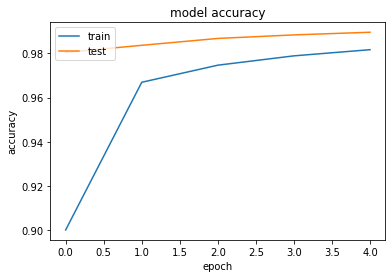

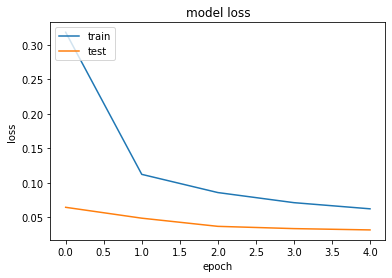

In [7]:
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
# モデルを使った予測(CNN)
from sklearn.metrics import confusion_matrix

predict_classes = model.predict_classes(x_test[1:100,], batch_size=32)
true_classes = np.argmax(y_test[1:100],1)
print(confusion_matrix(true_classes, predict_classes))

[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 11]]


In [27]:
x_test[1:2].shape

(1, 28, 28, 1)

In [35]:
data.shape

(28, 28)

In [37]:
data[np.newaxis, :, :, np.newaxis].shape

(1, 28, 28, 1)

In [45]:
#自分で書いた文字を認識させてみる
from PIL import Image
image = Image.open("1.png").convert('L')
image = image.resize((28, 28))
data = np.asarray(image, dtype=float)
data = data.astype('float32')
data /= 255
classes = model.predict_classes(data[np.newaxis, :, :, np.newaxis], batch_size=32)
print("予測ラベル: ", classes[0])

予測ラベル:  1
